In [3]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:

def takeSecond(elem):
    return elem[1]
def get_data(data_dir):
    with codecs.open(data_dir, "r", encoding="utf-8") as infile:
        train_data = []
        for id, line in enumerate(infile):
            res = []
            line = line.strip().split("\t")[2:]
            for w in line:
                w = w.split("|")
                res.append((int(w[0]), int(w[1])))
            res.sort(key=takeSecond)
            train_data.append(res)
    return train_data

In [3]:
Food_train_data = get_data("./dataset/Food-Kitchen/traindata_new.txt")
len(Food_train_data)

34117

## plot sequence length of Two domain

In [19]:
def get_domain_seq_length(train_data,source_id,data_name):
    all_data = []
    for l in train_data:
        X = []
        Y =[]
        for d in l:
            if d[0]<source_id:
                X.append(d)
            else:
                Y.append(d) 
        all_data.append((X, Y))
    X_length = []
    Y_length = []
    diff = []
    for d in all_data:
        X_length.append(len(d[0]))
        Y_length.append(len(d[1]))
        diff.append(len(d[0])-len(d[1]))
    # plt.figure(figsize=(4, 4))
    fig, axes = plt.subplots(1,2,figsize=(10, 5))
    df = pd.DataFrame({"X_length":X_length, "Y_length":Y_length,"length_diff":diff})
    print("Average sequence length of X domain",sum(df['X_length'])/len(df['X_length']))
    print("Average sequence length of Y domain",sum(df['Y_length'])/len(df['Y_length']))
    print("Average length_difference",sum(df['length_diff'])/len(df['length_diff']))
    df['X_length'].hist(bins=15, alpha=0.4, label='X_length',ax = axes[0])
    df['Y_length'].hist(bins=15, alpha=0.4, label='Y_length',ax = axes[0])
    axes[0].legend(loc='best')
    df['length_diff'].hist(bins=15, alpha=0.4, label='length_diff',ax = axes[1])
    axes[1].legend(loc='best')
    plt.suptitle(f"{data_name}")
    plt.show()

Average sequence length of X domain 6.887651317524988
Average sequence length of Y domain 6.405574933317701
Average length_difference 0.4820763842072867


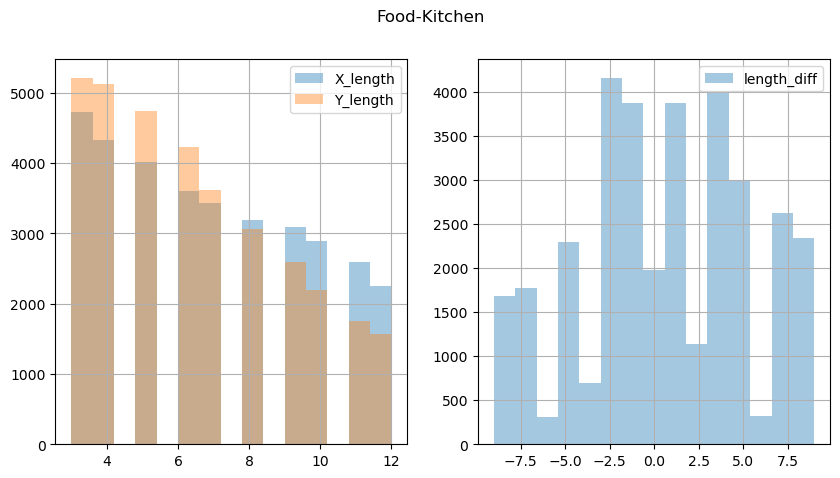

Average sequence length of X domain 6.862103734085277
Average sequence length of Y domain 5.734256173630693
Average length_difference 1.1278475604545843


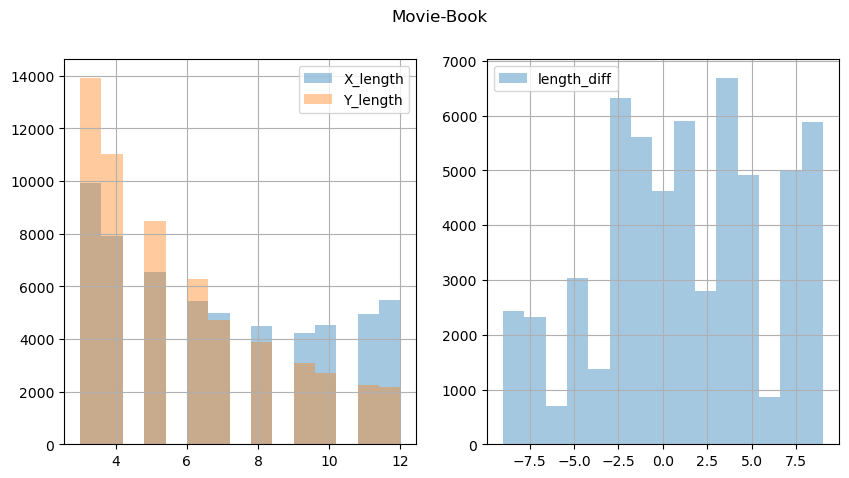

Average sequence length of X domain 15.84163799892237
Average sequence length of Y domain 14.133352675425872
Average length_difference 1.7082853234964976


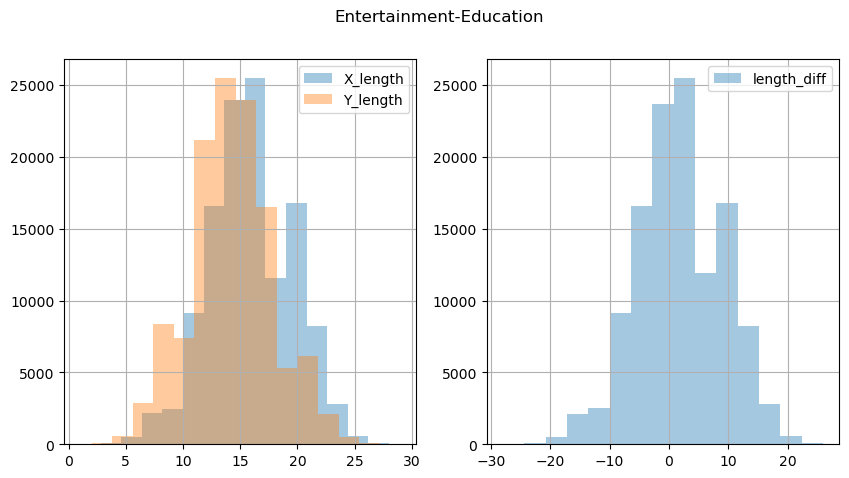

In [20]:
Food_train_data = get_data("./dataset/Food-Kitchen/traindata_new.txt")
Movie_train_data = get_data("./dataset/Movie-Book/traindata_new.txt")
Enter_train_data = get_data("./dataset/Entertainment-Education/traindata_new.txt")
get_domain_seq_length(Food_train_data,source_id = 29207, data_name = "Food-Kitchen")
get_domain_seq_length(Movie_train_data, source_id = 36845, data_name = "Movie-Book")
get_domain_seq_length(Enter_train_data, source_id = 8367, data_name = "Entertainment-Education")

In [31]:
from datetime import datetime

def get_hour_from_unix_timestamp(unix_timestamp):
    # Convert Unix timestamp to datetime object
    dt_object = datetime.fromtimestamp(unix_timestamp)
    
    # Extract the hour from the datetime object
    return dt_object.weekday()

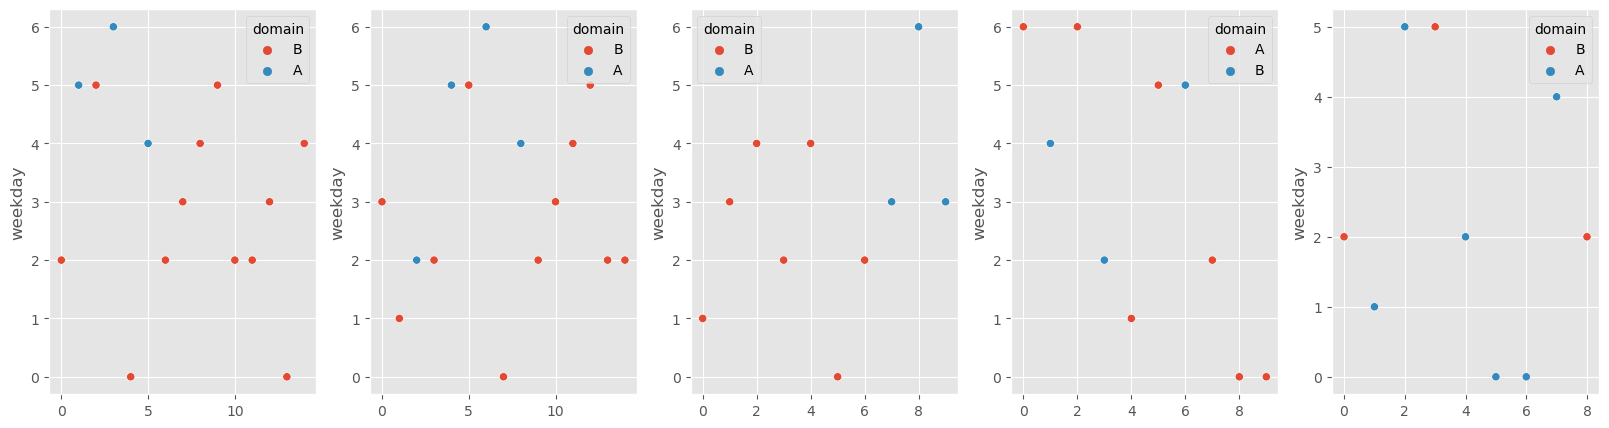

In [44]:
l = [[[u[0],get_hour_from_unix_timestamp(u[1]),'A'] if u[0] < 29207 else [u[0],get_hour_from_unix_timestamp(u[1]),'B'] for u in t] for t in train_data ]
plt.style.use('ggplot')

fig, ax = plt.subplots(1,5,figsize=(20,5))
c= 0
for i in range(5):
    df = pd.DataFrame(l[c],columns=["item_id","weekday","domain"])
    m = df["weekday"].min()
    df["weekday"] = df["weekday"] - m
    sns.scatterplot(x=range(len(df)),y=df["weekday"],hue=df["domain"],ax=ax[i])
    c+=1

In [12]:
train_data = get_data("./dataset/Entertainment-Education/traindata_new.txt")

In [22]:
def plot_item_sequence(train_data, data_name ):
    l = [[[u[0],u[1],'A'] if u[0] < 8367 else [u[0],u[1],'B'] for u in t] for t in train_data ]
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,5,figsize=(20,5))
    for i in range(5):
        c = random.randint(0,len(l))
        df = pd.DataFrame(l[c],columns=["item_id","time","domain"])
        m = df["time"].min()
        df["time"] = df["time"] - m
        sns.scatterplot(x=range(len(df)),y = df["time"],hue = df["domain"],ax=ax[i]).set_title(data_name)
        # sns.title = data_name
    plt.title(data_name)

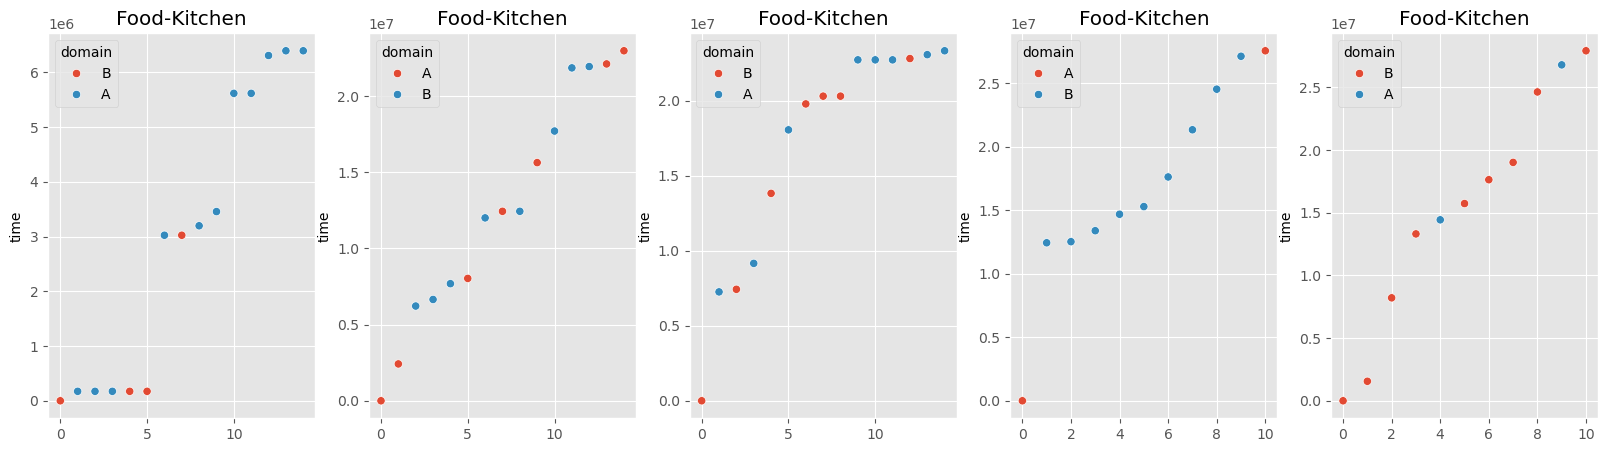

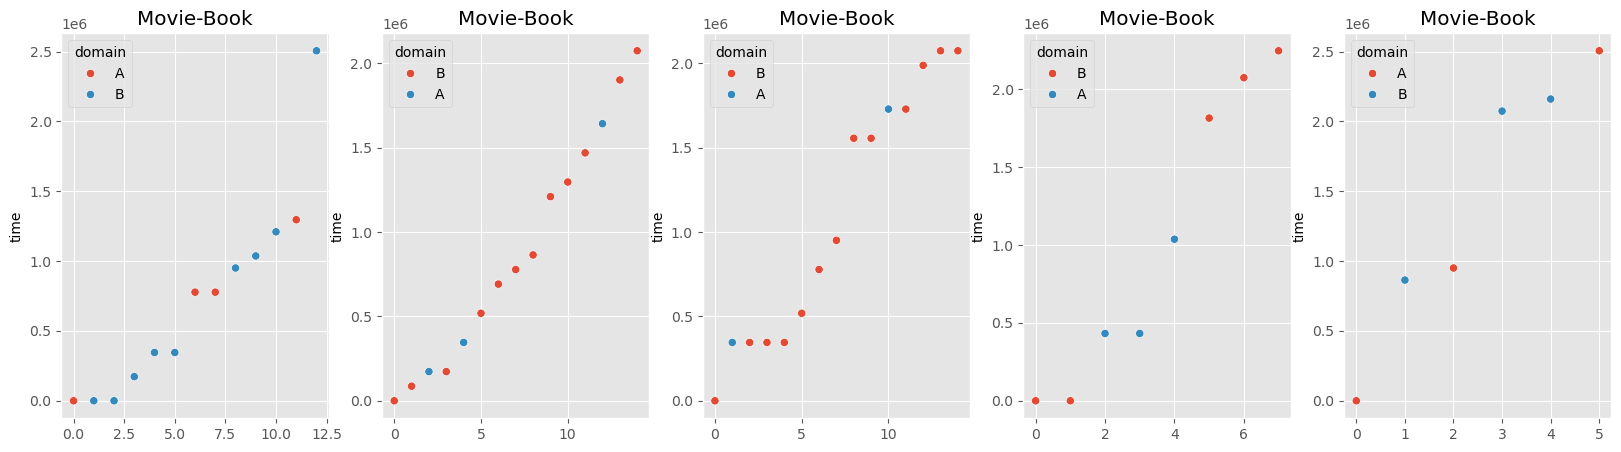

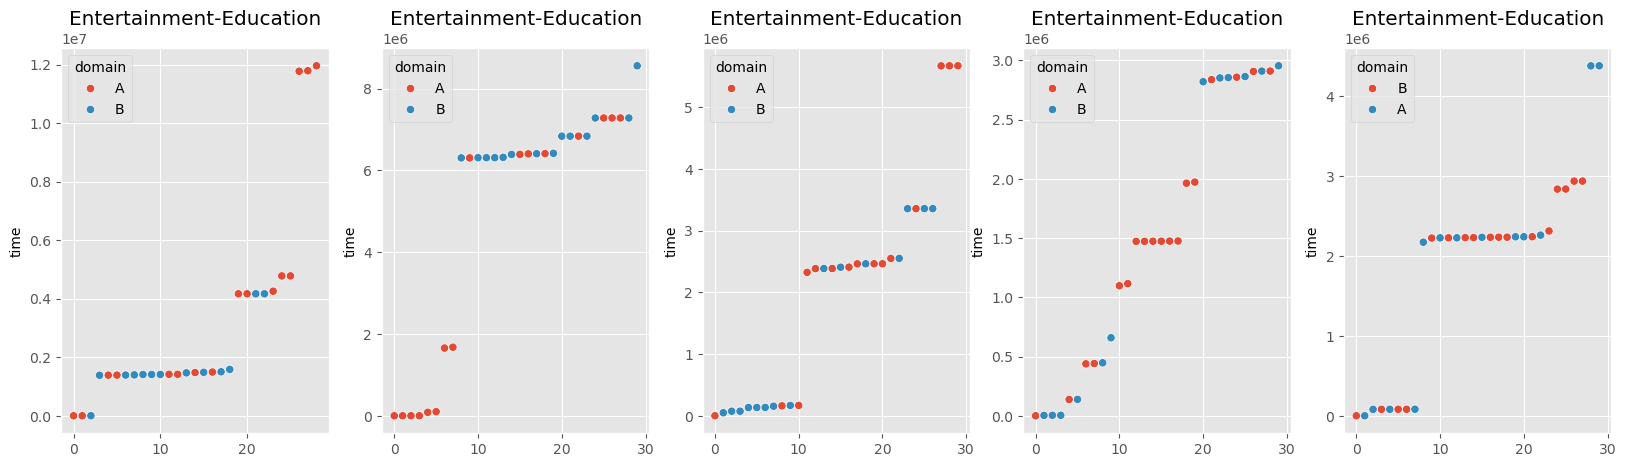

In [23]:
plot_item_sequence(Food_train_data, data_name = "Food-Kitchen")
plot_item_sequence(Movie_train_data, data_name = "Movie-Book")
plot_item_sequence(Enter_train_data, data_name = "Entertainment-Education")

## Plot Loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_loss(path):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,2,figsize=(8, 4))
    train_prediction_loss = np.load(f"{path}/1/train_pred_loss.npy").reshape(-1,1)
    train_in_domain_CL_loss = np.load(f"{path}/1/train_in_domain_CL_loss.npy").reshape(-1,1)
    val_pred_loss_X= np.load(f"{path}/1/val_pred_loss_X.npy").reshape(-1,1)
    val_pred_loss_Y = np.load(f"{path}/1/val_pred_loss_Y.npy").reshape(-1,1)
    train_loss = np.concatenate((train_prediction_loss,train_in_domain_CL_loss),axis=1)
    val_pred_loss = np.concatenate((val_pred_loss_X,val_pred_loss_Y),axis=1)
    df1 = pd.DataFrame(train_loss,columns=["train_prediction_loss","train_CL_loss"])
    
    df2 =pd.DataFrame(val_pred_loss,columns=["val_pred_loss_X","val_pred_loss_Y"])
    df1.plot(ax=ax[0])
    df2.plot(ax=ax[1])
def compare_val_loss(*args):
    print(len(args))
    plt.style.use('ggplot')
    plt.figure(figsize=(12,10))
    # fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y','tab:blue']
    for i in range(len(args)):
        val_pred_loss_X= np.load(f"{args[i]}/1/val_pred_loss_X.npy").reshape(-1,1)
        val_pred_loss_Y = np.load(f"{args[i]}/1/val_pred_loss_Y.npy").reshape(-1,1)
        loss_name = str(args[i]).split("/")[-1]
        plt.plot(val_pred_loss_X, color=colors[i],marker='x',markersize=3, label=f"{loss_name}_val_pred_loss_X")
        plt.plot(val_pred_loss_Y, color=colors[i], marker='o',markersize=3, label=f"{loss_name}_val_pred_loss_Y")
    plt.legend(loc='best')
    title = str(args[i]).split('/')[-2]
    plt.title(f"{title}")
def compare_train_loss(*args):
    print(len(args))
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y','k']
    for i in range(len(args)):
        train_pred_loss= np.load(f"{args[i]}/1/train_pred_loss.npy").reshape(-1,1)
        train_in_domain_CL_loss = np.load(f"{args[i]}/1/train_in_domain_CL_loss.npy").reshape(-1,1)
        loss_name = str(args[i]).split("/")[-1]
        ax.plot(train_pred_loss, color=colors[i],marker='x',markersize=3, label=f"{loss_name}_train_pred_loss")
        ax.plot(train_in_domain_CL_loss, color=colors[i], marker='o',markersize=3, label=f"{loss_name}_train_in_domain_CL_loss")
    title = str(args[i]).split('/')[-2]
    plt.title(f"{title}")
    plt.legend(loc='best')
def compare_pretrain_loss(*args):
    print(len(args))
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y','k']
    for i in range(len(args)):
        ssl_loss= np.load(f"{args[i]}/ssl_loss.npy").reshape(-1,1)
        X_prediction_loss = np.load(f"{args[i]}/X_prediction_loss.npy").reshape(-1,1)
        Y_prediction_loss = np.load(f"{args[i]}/Y_prediction_loss.npy").reshape(-1,1)
        loss_name = str(args[i]).split("/")[-1]
        ax.plot(ssl_loss, color=colors[i],marker='v',markersize=5, label=f"{loss_name}_ssl_loss")
        ax.plot(X_prediction_loss, color=colors[i], marker='o',markersize=5, label=f"{loss_name}_X_prediction_loss")
        ax.plot(Y_prediction_loss, color=colors[i], marker='x',markersize=5, label=f"{loss_name}_Y_prediction_loss")
    title = str(args[i]).split('/')[-2]
    plt.title(f"{title}")
    plt.legend(loc='best')


5


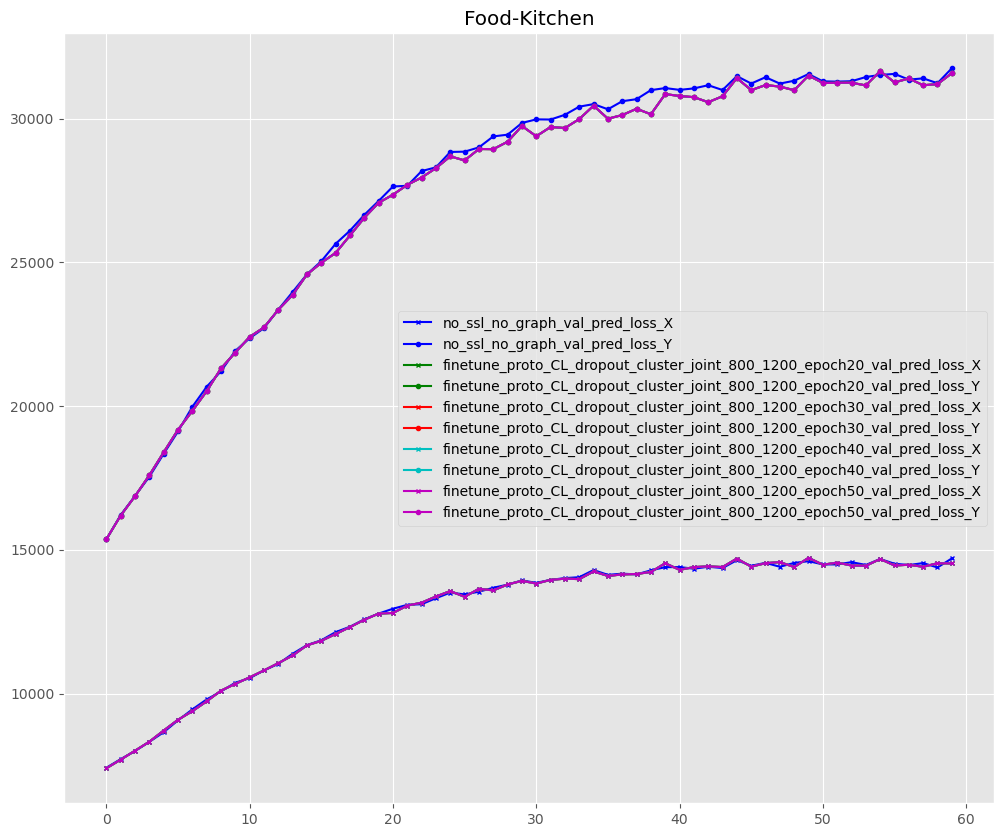

In [8]:
compare_val_loss("./loss/Food-Kitchen/no_ssl_no_graph",
                  "./loss/Food-Kitchen/finetune_proto_CL_dropout_cluster_joint_800_1200_epoch20",
                      "./loss/Food-Kitchen/finetune_proto_CL_dropout_cluster_joint_800_1200_epoch30",
                        "./loss/Food-Kitchen/finetune_proto_CL_dropout_cluster_joint_800_1200_epoch40",
                        "./loss/Food-Kitchen/finetune_proto_CL_dropout_cluster_joint_800_1200_epoch50",
                    
                        )

4


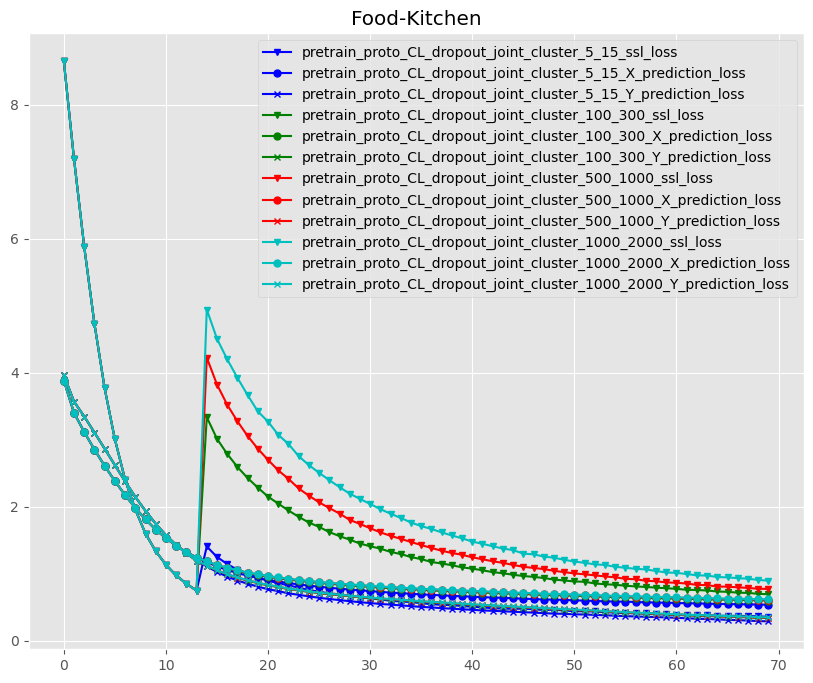

In [12]:
compare_pretrain_loss("./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_5_15",
                      "./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_100_300",
                        "./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_500_1000",
                        "./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_1000_2000")
# compare_pretrain_loss("./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_100_300","./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_500_1000","./loss/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_1000_2000")

3


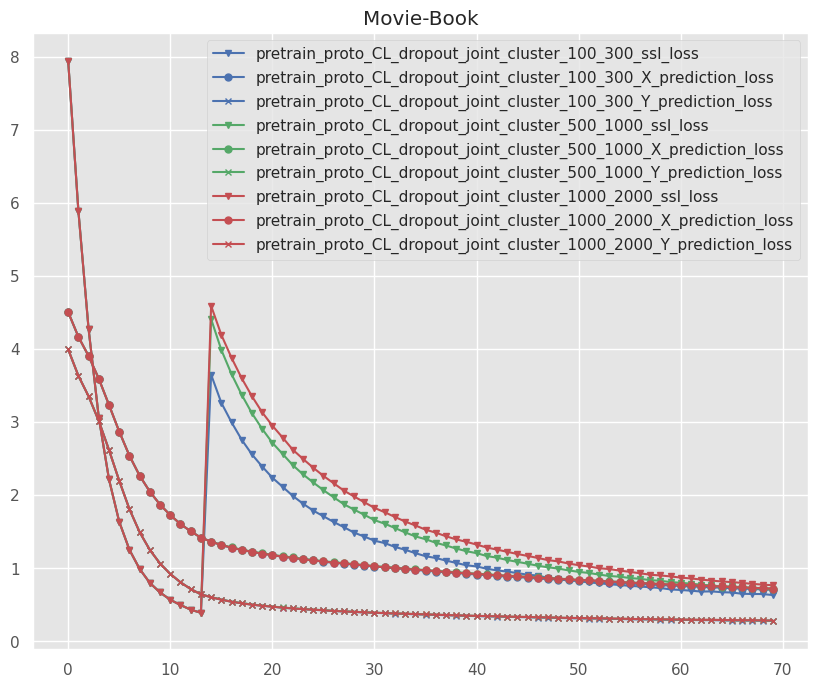

In [55]:
compare_pretrain_loss("./loss/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_100_300","./loss/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_500_1000","./loss/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_1000_2000")

5
5


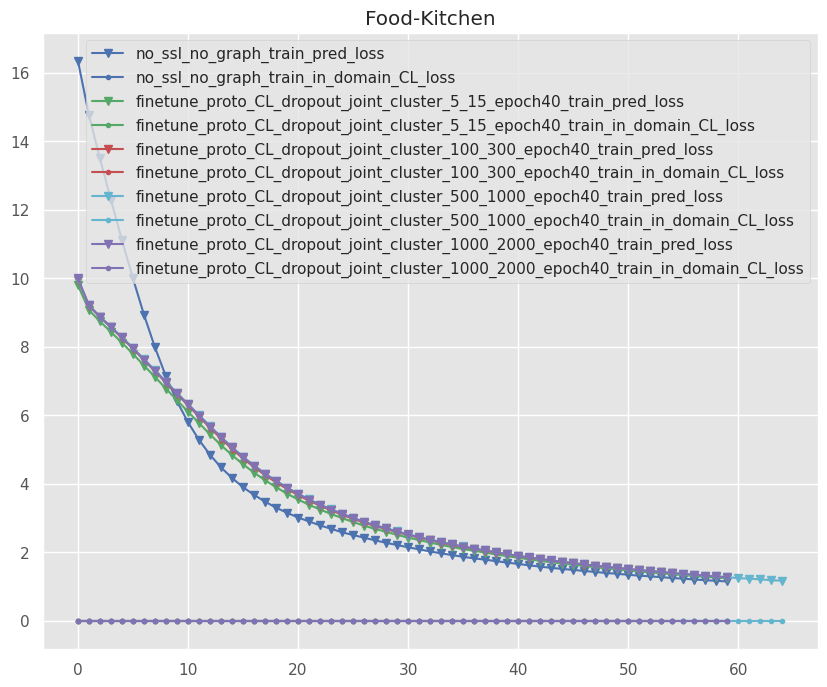

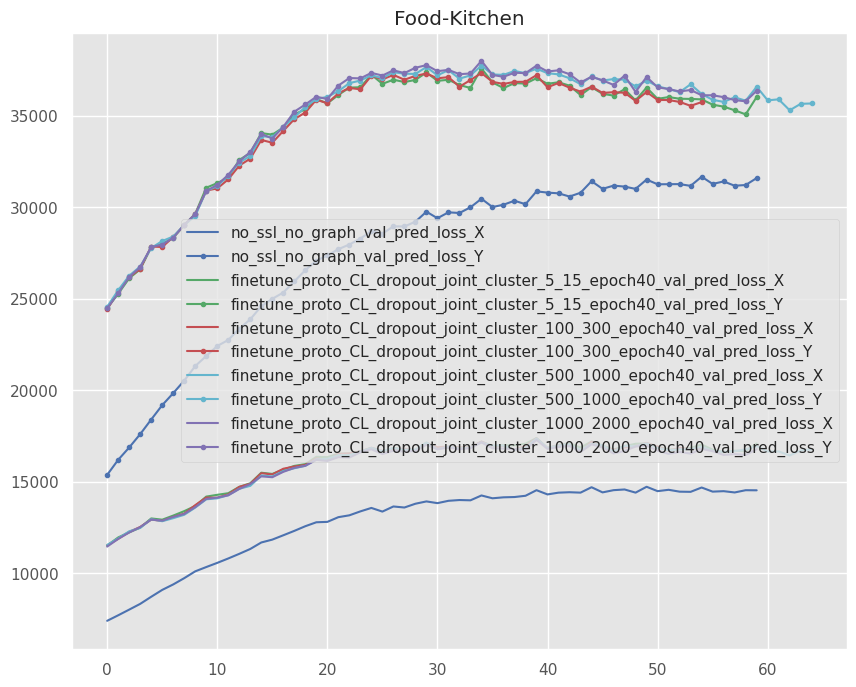

In [48]:
compare_train_loss("./loss/Food-Kitchen/no_ssl_no_graph","loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_5_15_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_100_300_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_500_1000_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_1000_2000_epoch40",
                 )
compare_val_loss("./loss/Food-Kitchen/no_ssl_no_graph","loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_5_15_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_100_300_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_500_1000_epoch40",
                "loss/Food-Kitchen/finetune_proto_CL_dropout_joint_cluster_1000_2000_epoch40",
                 )

5
5


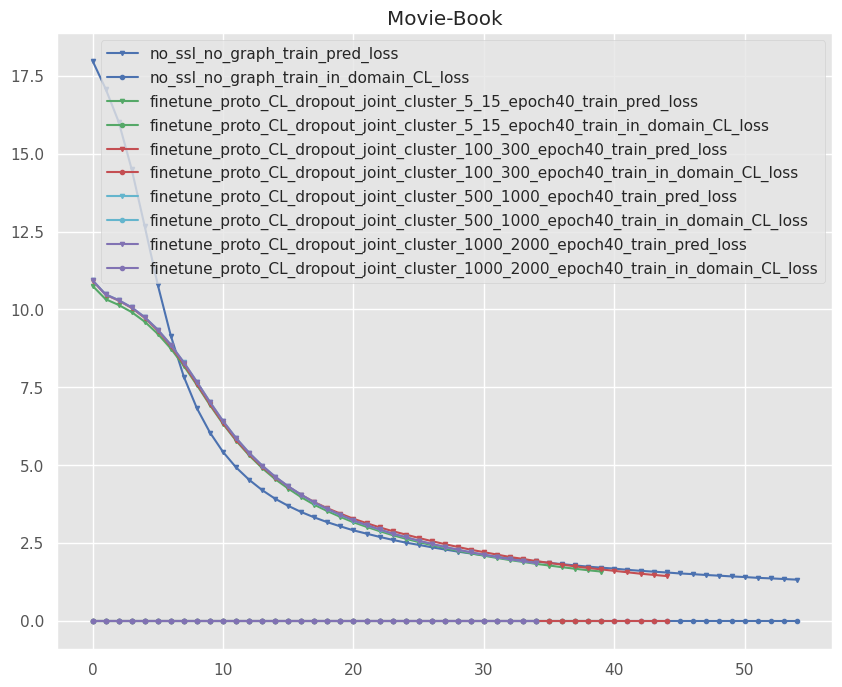

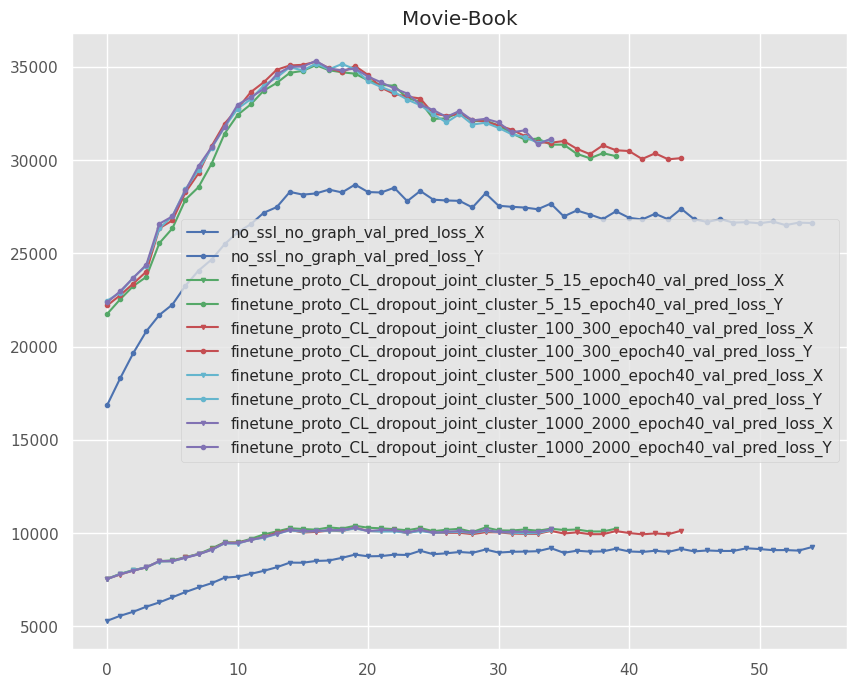

In [56]:
compare_train_loss("./loss/Movie-Book/no_ssl_no_graph","loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_5_15_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_500_1000_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_1000_2000_epoch40",
                 )
compare_val_loss("./loss/Movie-Book/no_ssl_no_graph","loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_5_15_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_500_1000_epoch40",
                "loss/Movie-Book/finetune_proto_CL_dropout_joint_cluster_1000_2000_epoch40",
                 )

4


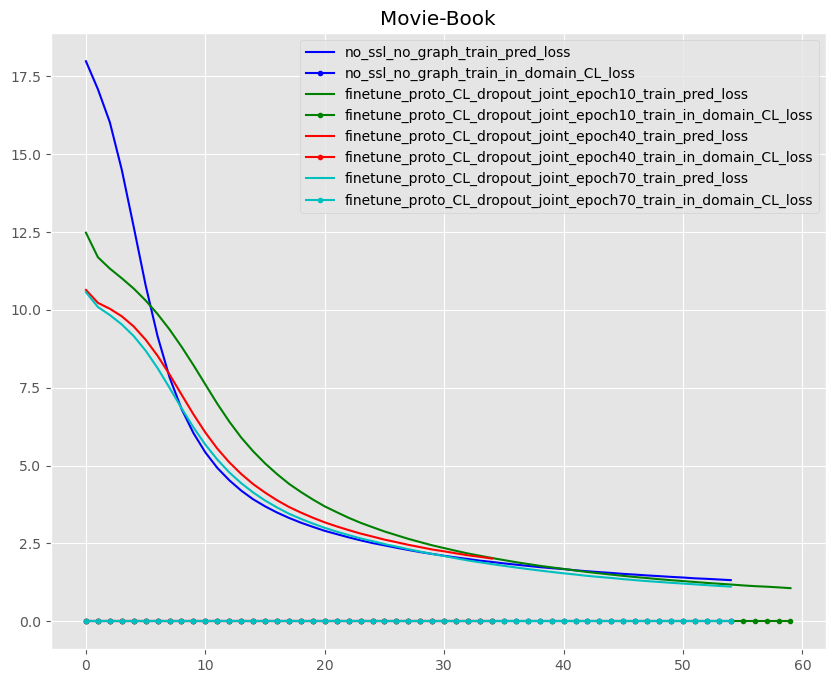

In [78]:
compare_train_loss("./loss/Movie-Book/no_ssl_no_graph","./loss/Movie-Book/finetune_proto_CL_dropout_joint_epoch10",
                 "./loss/Movie-Book/finetune_proto_CL_dropout_joint_epoch40","./loss/Movie-Book/finetune_proto_CL_dropout_joint_epoch70")

## plot embedding for ssl

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from model.C2DSR import C2DSR
# from utils.GraphMaker import * 
import torch
import argparse
from utils.loader import *
from utils.collator import *
parser = argparse.ArgumentParser()
# dataset part
parser.add_argument('--data_dir', type=str, default='action_animation', help='Movie-Book, Entertainment-Education')
# model part
parser.add_argument('--model', type=str, default="C2DSR", help='model name')
parser.add_argument('--hidden_units', type=int, default=128, help='lantent dim.')

parser.add_argument('--num_blocks', type=int, default=2, help='lantent dim.')
parser.add_argument('--num_heads', type=int, default=1, help='lantent dim.')
parser.add_argument('--GNN', type=int, default=1, help='GNN depth.')
parser.add_argument('--dropout', type=float, default=0.2, help='dropout rate.')
parser.add_argument('--optim', choices=['adamW','sgd', 'adagrad', 'adam', 'adamax'], default='adam',help='Optimizer: sgd, adagrad, adam or adamax.')
parser.add_argument('--param_group', type = bool, default=False, help='param group')
parser.add_argument('--lr', type=float, default=0.001, help='Applies to sgd and adagrad.')
parser.add_argument('--lr_decay', type=float, default=1, help='Learning rate decay rate.')
parser.add_argument('--weight_decay', type=float, default=5e-4, help='Weight decay (L2 loss on parameters).')
parser.add_argument('--decay_epoch', type=int, default=5, help='Decay learning rate after this epoch.')
parser.add_argument('--max_grad_norm', type=float, default=5.0, help='Gradient clipping.')
parser.add_argument('--leakey', type=float, default=0.1)
parser.add_argument('--maxlen', type=int, default=50)
parser.add_argument('--cpu', action='store_true', help='Ignore CUDA.')
parser.add_argument('--cuda', type=bool, default=torch.cuda.is_available(), help='Enables CUDA training.')
parser.add_argument('--lambda', type=float, default=0.7)       

# train part
parser.add_argument('--num_epoch', type=int, default=200, help='Number of total training epochs.')
parser.add_argument('--batch_size', type=int, default=256, help='Training batch size.')
parser.add_argument('--log_step', type=int, default=200, help='Print log every k steps.')
parser.add_argument('--log', type=str, default='log.txt', help='Write training log to file.')
parser.add_argument('--save_epoch', type=int, default=100, help='Save model checkpoints every k epochs.')
parser.add_argument('--save_dir', type=str, default='./saved_models', help='Root dir for saving models.')
parser.add_argument('--id', type=str, default=00, help='Model ID under which to save models.')
parser.add_argument('--seed', type=int, default=2023)
parser.add_argument('--load', dest='load', action='store_true', default=False,  help='Load pretrained model.')
parser.add_argument('--model_file', type=str, help='Filename of the pretrained model.')
parser.add_argument('--info', type=str, default='', help='Optional info for the experiment.')
parser.add_argument('--undebug', action='store_false', default=True)

# data augmentation
parser.add_argument('--augment_type', type=str, default="dropout", help='augment type: [crop,dropout]')
parser.add_argument('--crop_prob', type=float, default=0.7, help='crop probability')
parser.add_argument('--mask_prob', type=float, default=0.2, help='mask probability')
# time ssl
parser.add_argument('--window_size',type=int,default=3 ,help="window size for ssl")
parser.add_argument('--temp',type=float,default=0.05 ,help="temperature for ssl")
parser.add_argument('--ssl',type=str ,default="proto_CL" ,help="[mask_prediction,time_CL, augmentation_based_CL, no_ssl, proto_CL]")
#early stop
parser.add_argument("--pretrain_patience", type=int, default=1000, help="early stop counter")
parser.add_argument("--finetune_patience", type=int, default=5, help="early stop counter")
parser.add_argument('--pooling',type=str,default="ave" ,help="pooling method")
parser.add_argument('--is_pooling',type=bool,default=True ,help="pooling or not")
#MoCo
parser.add_argument('--r',type=int,default=2048 ,help="queue size/negative sample") #warning : r must be divisible by batch_size
parser.add_argument('--m',type=float,default=0.999 ,help="momentum update ratio for moco")
parser.add_argument('--num_cluster', type=str, default= '2000,3000,4000' ,help="number of clusters for kmeans")
parser.add_argument('--warmup_epoch', type=int, default= 15 ,help="warmup epoch for cluster")
parser.add_argument('--mlp',type=bool,default=True ,help="use MoCo or not")
parser.add_argument('--cross_weight',type=float,default=0.001 ,help="cross domain weight for proto CL")
parser.add_argument('--num_proto_neg',type=int,default= 1280 ,help="intra domain weight for proto CL")

#pretrain
parser.add_argument('--training_mode',default= "finetune", type = str, help=["pretrain","joint_pretrain","finetune","joint_learn"])
parser.add_argument('--pretrain_model',type=str,default= None ,help="pretrain or not")
parser.add_argument('--pretrain_epoch',type=int,default= 70 ,help="pretrain epoch")
parser.add_argument('--load_pretrain_epoch',type=int,default= None ,help="pretrain epoch")

#time encoding
parser.add_argument('--time_encode',type=bool,default= False ,help="time encoding or not")
parser.add_argument('--time_embed', type=int, default=128, help='time dim.')
parser.add_argument('--speedup_scale', type=list, default = [0.3,0.5] , help='should be smaller than 1')
parser.add_argument('--slowdown_scale', type=int, default=[2,3], help='should be larger than 1') # 
parser.add_argument('--time_transformation', type=str, default="speedup", help="[speedup,slowdown]")

parser.add_argument('--valid_epoch', type=int, default=3, help='valid_epoch')
parser.add_argument('--mixed_included',type=bool,default= False ,help="mixed included or not")
parser.add_argument('--main_task',type=str,default="X" ,help="[dual, X, Y]")

parser.add_argument('--evaluation_model',type=str,default= None ,help="evaluation model")
parser.add_argument('--domain',type=str,default= "cross" ,help="target only or cross domain")
args, unknown = parser.parse_known_args([])
opt = vars(args)

In [21]:
def get_embedding(seq, item_embed, encoder):
    seq = seq.view(-1, opt["maxlen"])
    non_zero_mask = (seq != (opt["source_item_num"] + opt["target_item_num"])).long()
    position_id = non_zero_mask.cumsum(dim=1) * non_zero_mask
    seq_feat = item_embed(seq)
    
    feat = encoder(seq, seq_feat, position_id, causality_mask = False)  # keys: NxC
    if opt["pooling"] == "bert":
        feat = feat[:,0,:]
    elif opt["pooling"] == "ave":
        feat= torch.sum(feat, dim=1)/torch.sum(non_zero_mask, dim=1).unsqueeze(-1) #[B,2,H]
    return feat

### original sample

In [77]:
DATA_DIR = "action_romance"
# DATA_DIR = "Movie-Book"

In [78]:
#train data
opt['data_dir'] = DATA_DIR
train_collator = CLDataCollator(opt, eval=-1)
train_data = DataLoader(opt['data_dir'], opt['batch_size'], opt, evaluation = -1, collate_fn = None)
flat_train_data = torch.zeros((len(train_data), 256, opt["maxlen"]))
flat_train_data_gender = torch.zeros((len(train_data), 256, opt["maxlen"]))
for i,d in enumerate(train_data):
    flat_train_data[i] = d[2] #no augment
    flat_train_data_gender[i] = d[28] #no augment
flat_train_data = flat_train_data.reshape(-1,  50)
flat_train_data_gender = flat_train_data_gender.reshape(-1,  50)
print("Finish loading train data")
# # validation data
# val_data = DataLoader(opt['data_dir'], opt['batch_size'], opt, evaluation = 2)
# flat_val_data_X = torch.zeros((len(val_data)-1, 2048, opt["maxlen"]))
# flat_val_data_Y = torch.zeros((len(val_data)-1, 2048, opt["maxlen"]))
# flat_val_data_mixed = torch.zeros((len(val_data)-1, 2048, opt["maxlen"]))
# for i,d in enumerate(val_data):
#     if len(d[1]) != 2048:
#         continue
#     flat_val_data_X[i] = d[1] #no augment
#     flat_val_data_Y[i] = d[2] #no augment
#     flat_val_data_mixed[i] = d[0]
# flat_val_data_X = flat_val_data_X.reshape(-1,  50)
# flat_val_data_Y = flat_val_data_Y.reshape(-1,  50)
# flat_val_data_mixed =flat_val_data_mixed.reshape(-1,  50)
# print("Finish loading val data")

train_data length: 10004
Finish loading train data


In [79]:
import seaborn as sns
import pandas as pd
def cal_alignment_uniformity(model_path,seed, domain="X", mode ='train',train_mode = "train"):
    def lalign(x, y, alpha=1.5):
        return (x - y).norm(dim=1).pow(alpha).mean()

    def lunif(x, t=0.5):
        sq_pdist = torch.pdist(x, p=2).pow(2)
        return sq_pdist.mul(-t).exp().mean().log()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    filename = opt["data_dir"]
    train_data = "./fairness_dataset/Movie_lens_new/" + filename + "/traindata_new.txt"
    # G = GraphMaker(opt, train_data)
    # adj, adj_single = G.adj, G.adj_single
    model = C2DSR(opt, None, None).to(device)
    if train_mode=="pretrain":
        ckpt = torch.load(model_path)
        model.load_state_dict(ckpt['model'])
    else:
        model.load_state_dict(torch.load(model_path))
    model.eval()
    if mode =="train":
        np.random.seed(seed)
        selected_index = np.random.choice(list(range(len(flat_train_data_augmented_X))),replace=False,size=10000)
        if domain =="X":
            seq  = flat_train_data_augmented_X[selected_index].long().to(device)
        elif domain =="Y":
            seq  = flat_train_data_augmented_Y[selected_index].long().to(device)
        elif domain =="mixed":
            seq  = flat_train_data_augmented_mixed[selected_index].long().to(device)
    elif mode =="val":
        np.random.seed(seed)
        selected_index = np.random.choice(list(range(len(flat_val_data_augmented_X))),replace=False,size=6000)
        if domain =="X":
            seq = flat_val_data_augmented_X[selected_index].long().to(device)
        elif domain =="Y":
            seq = flat_val_data_augmented_Y[selected_index].long().to(device)
        elif domain =="mixed":
            seq  = flat_val_data_augmented_mixed[selected_index].long().to(device)
    if domain=="X":
        feat = get_embedding(seq, model.item_emb_X, model.encoder_X).reshape(-1,opt['hidden_units'])
    elif domain=="Y":
        feat = get_embedding(seq, model.item_emb_Y, model.encoder_Y).reshape(-1,opt['hidden_units'])
    elif domain=="mixed":
        feat = get_embedding(seq, model.item_emb, model.encoder).reshape(-1,opt['hidden_units'])
    feat =feat.reshape(-1,2,opt['hidden_units'])
    # feat = torch.nn.functional.normalize(feat)
    align = lalign(feat[:,0,:], feat[:,1,:]).item()
    unif = lunif(feat[:,0,:]).item()
    print(f"{domain} domain {mode} - align:{align}, unif:{unif}")
    return align, unif
def cal_alignment_uniformity_all(model_path, seed, train_mode = "train"):
    cal_alignment_uniformity(model_path, seed=seed, domain= "X", mode = "train", train_mode = train_mode)
    cal_alignment_uniformity(model_path, seed=seed, domain= "Y", mode = "train", train_mode = train_mode)
    cal_alignment_uniformity(model_path, seed=seed, domain= "mixed", mode = "train", train_mode = train_mode)
    cal_alignment_uniformity(model_path, seed=seed, domain= "X", mode = "val", train_mode = train_mode)
    cal_alignment_uniformity(model_path, seed=seed, domain= "Y", mode = "val", train_mode = train_mode)
    cal_alignment_uniformity(model_path ,seed=seed, domain= "mixed", mode = "val", train_mode = train_mode)

In [80]:
import seaborn as sns
import pandas as pd
def plot_embedding_for_x_y(model_path,seed, mode ='train', size = 3000):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    filename = opt["data_dir"]
    train_data = "./fairness_dataset/Movie_lens_new/" + filename + "/train.txt"
    # G = GraphMaker(opt, train_data)
    # adj, adj_single = G.adj, G.adj_single
    model = C2DSR(opt, None, None).to(device)
    ckpt = torch.load(model_path)
    model.load_state_dict(ckpt['model'])
   
    model.eval()
    
    if mode =="train":
        np.random.seed(seed)
        train_selected_index = np.random.choice(list(range(len(flat_train_data))),replace=False,size=size)
        seq_Y  = flat_train_data[train_selected_index].long().to(device)
        gender = flat_train_data_gender[train_selected_index].long().to(device)
    elif mode =="val":
        np.random.seed(seed)
        val_selected_index = np.random.choice(list(range(len(flat_val_data_X))),replace=False,size=size)
        
    feat = get_embedding(seq_Y, model.item_emb_Y, model.encoder_Y).reshape(-1,opt['hidden_units'])
    feat= feat.cpu().detach().numpy()
    label = gender[:,0].cpu().detach().numpy()
    tsne_X = TSNE(n_components=2, random_state=0)
    feat_X_2d = tsne_X.fit_transform(feat)
    # print(feat_X_2d.shape)
    print(sum(label))
    df = pd.DataFrame({"X":feat_X_2d[:,0], "Y":feat_X_2d[:,1], "label":label})
    plt.figure(figsize=(5, 5))
    ax = sns.scatterplot(data = df, x = "X", y = "Y", hue = "label")
    # ax.set_title(f"{domain} domain {mode} data")
    plt.show()

715


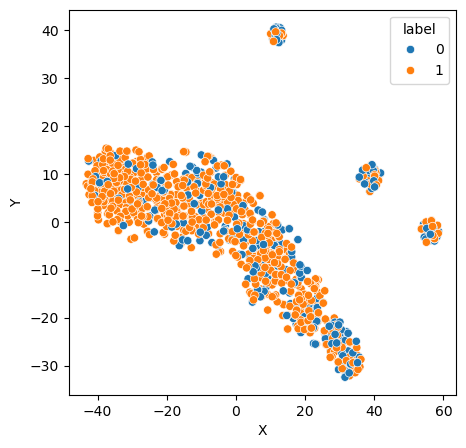

In [81]:
plot_embedding_for_x_y("./models/action_romance/fairness_baseline_Y_single/1/Y_model.pt", seed=1, mode ='train',  size = 1000)
# plot_embedding_for_x_y("./models/adventure_romance/fairness_baseline_Y_single/1/Y_model.pt", seed=1, mode ='train', train_mode="pretrain", size = 1000)

In [28]:
import seaborn as sns
import pandas as pd
def plot_embedding_for_all(model_path,seed, train_mode="train", size = 3000, n_components = 2):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # device ="cpu"

    filename = opt["data_dir"]
    train_data = "./dataset/" + filename + "/traindata_new.txt"
    G = GraphMaker(opt, train_data)
    adj, adj_single = G.adj, G.adj_single
    model = C2DSR(opt, adj, adj_single).to(device)
    if train_mode=="pretrain":
        ckpt = torch.load(model_path)
        model.load_state_dict(ckpt['model'])
    else:
        model.load_state_dict(torch.load(model_path))
    model.eval()
    
    
    np.random.seed(seed)
    train_selected_index = np.random.choice(list(range(len(flat_train_data_X))),replace=False,size=size)
    train_seq_X  = flat_train_data_X[train_selected_index].long().to(device)
    train_seq_Y = flat_train_data_Y[train_selected_index].long().to(device)
    train_seq_mixed = flat_train_data_mixed[train_selected_index].long().to(device)
    np.random.seed(seed)
    val_selected_index = np.random.choice(list(range(len(flat_val_data_X))),replace=False,size=size)
    val_seq_X  = flat_val_data_X[val_selected_index].long().to(device)
    val_seq_Y = flat_val_data_Y[val_selected_index].long().to(device)
    val_seq_mixed = flat_val_data_mixed[val_selected_index].long().to(device)
    
    train_feat_X = get_embedding(train_seq_X, model.item_emb_X, model.encoder_X).reshape(-1,opt['hidden_units'])
    train_feat_Y = get_embedding(train_seq_Y, model.item_emb_Y, model.encoder_Y).reshape(-1,opt['hidden_units'])
    train_feat_mixed =get_embedding(train_seq_mixed, model.item_emb, model.encoder).reshape(-1,opt['hidden_units'])
    train_feat_X = train_feat_X.cpu().detach().numpy()
    train_feat_Y = train_feat_Y.cpu().detach().numpy()
    train_feat_mixed = train_feat_mixed.cpu().detach().numpy()
    
    val_feat_X = get_embedding(val_seq_X, model.item_emb_X, model.encoder_X).reshape(-1,opt['hidden_units'])
    val_feat_Y = get_embedding(val_seq_Y, model.item_emb_Y, model.encoder_Y).reshape(-1,opt['hidden_units'])
    val_feat_mixed =get_embedding(val_seq_mixed, model.item_emb, model.encoder).reshape(-1,opt['hidden_units'])
    val_feat_X = val_feat_X.cpu().detach().numpy()
    val_feat_Y = val_feat_Y.cpu().detach().numpy()
    val_feat_mixed = val_feat_mixed.cpu().detach().numpy()
    

    tsne_X = TSNE(n_components=n_components, random_state=0)
    train_feat_X_2d = tsne_X.fit_transform(train_feat_X)
    tsne_Y = TSNE(n_components=n_components, random_state=0)
    train_feat_Y_2d = tsne_Y.fit_transform(train_feat_Y)
    tsne_mixed = TSNE(n_components=n_components, random_state=0)
    train_feat_mixed_2d = tsne_mixed.fit_transform(train_feat_mixed)
    
    tsne_X = TSNE(n_components=n_components, random_state=0)
    val_feat_X_2d = tsne_X.fit_transform(val_feat_X)
    tsne_Y = TSNE(n_components=n_components, random_state=0)
    val_feat_Y_2d = tsne_Y.fit_transform(val_feat_Y)
    tsne_mixed = TSNE(n_components=n_components, random_state=0)
    val_feat_mixed_2d = tsne_mixed.fit_transform(val_feat_mixed)

    if n_components == 2:    
        train_X_df = pd.DataFrame({"X":train_feat_X_2d[:,0], "Y":train_feat_X_2d[:,1]})
        train_Y_df = pd.DataFrame({"X":train_feat_Y_2d[:,0], "Y":train_feat_Y_2d[:,1]})
        train_mixed_df = pd.DataFrame({"X":train_feat_mixed_2d[:,0], "Y":train_feat_mixed_2d[:,1]})
        
        val_X_df = pd.DataFrame({"X":val_feat_X_2d[:,0], "Y":val_feat_X_2d[:,1]})
        val_Y_df = pd.DataFrame({"X":val_feat_Y_2d[:,0], "Y":val_feat_Y_2d[:,1]})
        val_mixed_df = pd.DataFrame({"X":val_feat_mixed_2d[:,0], "Y":val_feat_mixed_2d[:,1]})
        fig,axes = plt.subplots(2,3,figsize=(15, 10))
        c = 0
        color_list = ['red', 'green', 'blue']
        
        all_df = {"train_X":train_X_df,
                "train_Y":train_Y_df,
                "train_mixed":train_mixed_df,
                "val_X":val_X_df,
                "val_Y":val_Y_df,
                "val_mixed":val_mixed_df}
        for i in range(2):
            for j in range(3):
                key = list(all_df.keys())[c]
                df = all_df[key]
                ax = sns.scatterplot(data = df, x = "X", y = "Y",color = color_list[j], ax = axes[i][j])
                # palette=sns.color_palette('coolwarm', as_cmap = True)
                sns.set(style="whitegrid")
                ax.set_title(f"{key} data")
                c+=1
        model_name = model_path.split('/')[3]
        plt.suptitle(f"{model_name}")
        plt.show()
    elif n_components == 3:
        train_X_df = pd.DataFrame({"X":train_feat_X_2d[:,0], "Y":train_feat_X_2d[:,1],"color":train_feat_X_2d[:,2]})
        train_Y_df = pd.DataFrame({"X":train_feat_Y_2d[:,0], "Y":train_feat_Y_2d[:,1], "color":train_feat_Y_2d[:,2]})
        train_mixed_df = pd.DataFrame({"X":train_feat_mixed_2d[:,0], "Y":train_feat_mixed_2d[:,1], "color":train_feat_mixed_2d[:,2]})
        
        val_X_df = pd.DataFrame({"X":val_feat_X_2d[:,0], "Y":val_feat_X_2d[:,1], "color":val_feat_X_2d[:,2]})
        val_Y_df = pd.DataFrame({"X":val_feat_Y_2d[:,0], "Y":val_feat_Y_2d[:,1], "color":val_feat_Y_2d[:,2]})
        val_mixed_df = pd.DataFrame({"X":val_feat_mixed_2d[:,0], "Y":val_feat_mixed_2d[:,1], "color":val_feat_mixed_2d[:,2]})
        fig,axes = plt.subplots(2,3,figsize=(15, 10))
        c = 0
        color_list = ['red', 'green', 'blue']
        
        all_df = {"train_X":train_X_df,
                "train_Y":train_Y_df,
                "train_mixed":train_mixed_df,
                "val_X":val_X_df,
                "val_Y":val_Y_df,
                "val_mixed":val_mixed_df}
        for i in range(2):
            for j in range(3):
                key = list(all_df.keys())[c]
                df = all_df[key]
                ax = sns.scatterplot(data = df, x = "X", y = "Y",hue = "color", ax = axes[i][j],palette=sns.color_palette("ch:s=.25,rot=-.25",as_cmap=True))
                # palette=sns.color_palette('coolwarm', as_cmap = True)
                sns.set(style="whitegrid")
                ax.set_title(f"{key} data")
                c+=1
        model_name = model_path.split('/')[3]
        plt.suptitle(f"{model_name}")
        plt.show()

In [26]:
path = "./models/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch10/1/pretrain_model.pt"
size = 1500
n_components = 3    
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path = "./models/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch40/1/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path = "./models/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch70/1/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")

real graph loaded!


FileNotFoundError: [Errno 2] No such file or directory: './models/Movie-Book/finetune_proto_CL_dropout_joint_cluster_100_300_epoch10/1/pretrain_model.pt'

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!


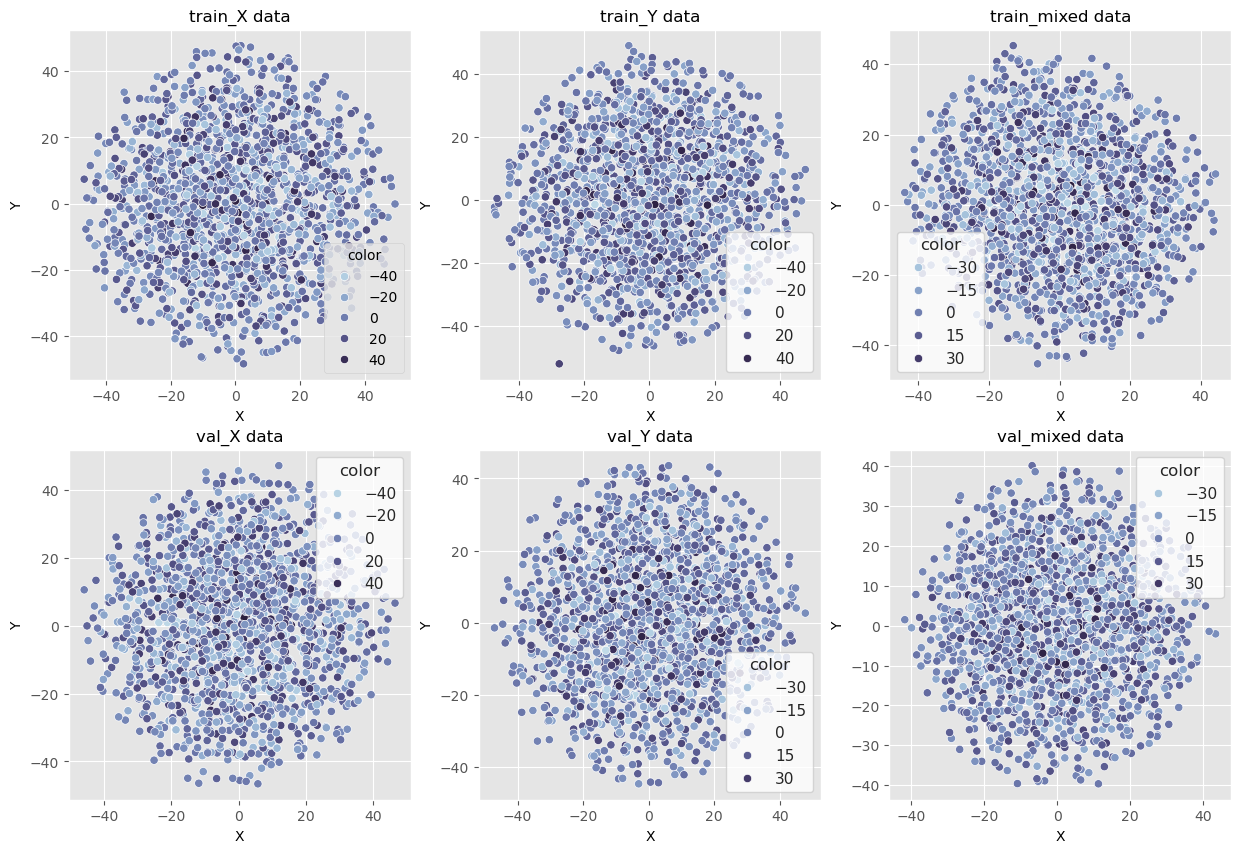

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:28.422042846679688, unif:-11.629359245300293
real graph loaded!
Y domain train - align:26.5252742767334, unif:-11.318904876708984
real graph loaded!
mixed domain train - align:4.492570400238037, unif:-9.879883766174316
real graph loaded!
X domain val - align:35.874664306640625, unif:-13.933127403259277
real graph loaded!
Y domain val - align:28.247764587402344, unif:-13.633017539978027
real graph loaded!
mixed domain val - align:5.53752326965332, unif:-12.016545295715332
real graph loaded!


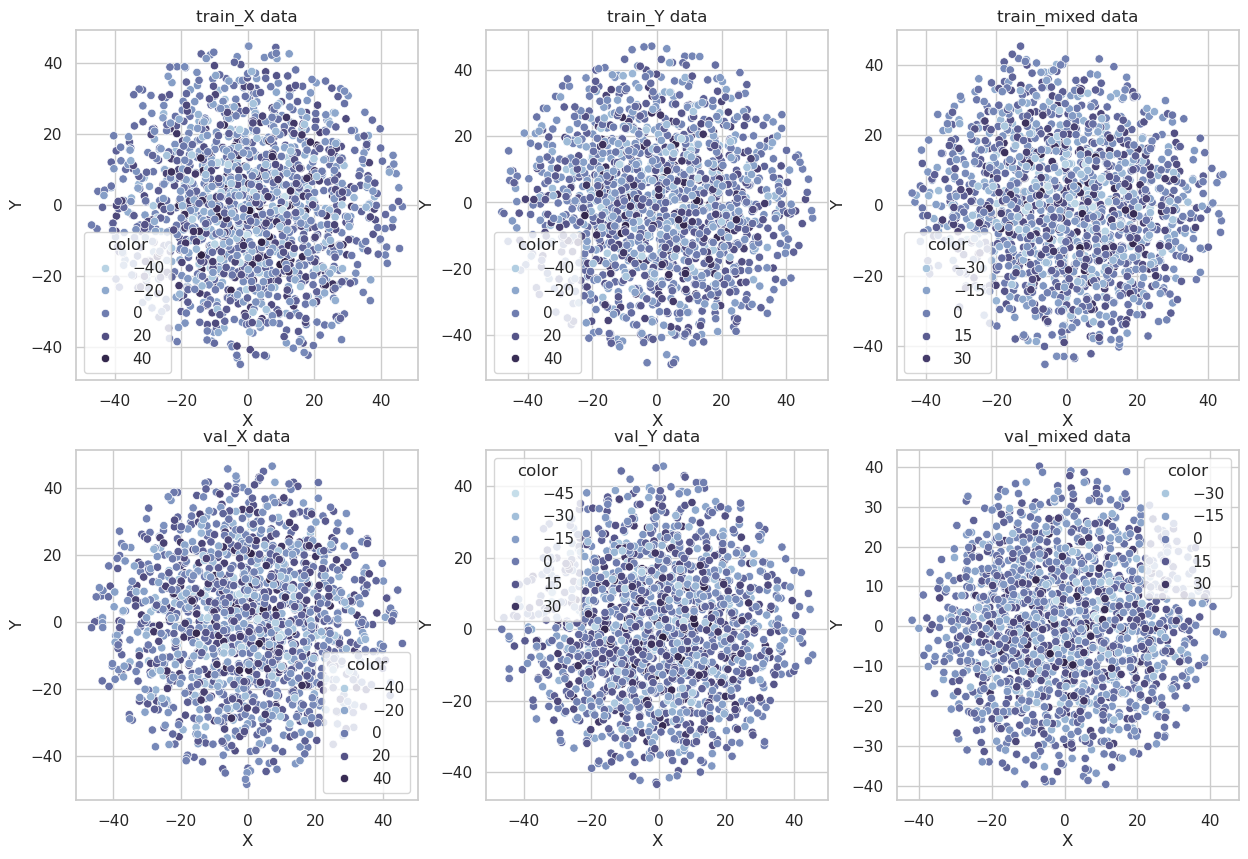

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:71.67982482910156, unif:-11.629359245300293
real graph loaded!
Y domain train - align:61.66114044189453, unif:-11.318904876708984
real graph loaded!
mixed domain train - align:4.492570400238037, unif:-9.879883766174316
real graph loaded!
X domain val - align:93.6390380859375, unif:-13.933127403259277
real graph loaded!
Y domain val - align:67.64271545410156, unif:-13.608638763427734
real graph loaded!
mixed domain val - align:5.53752326965332, unif:-12.016545295715332
real graph loaded!


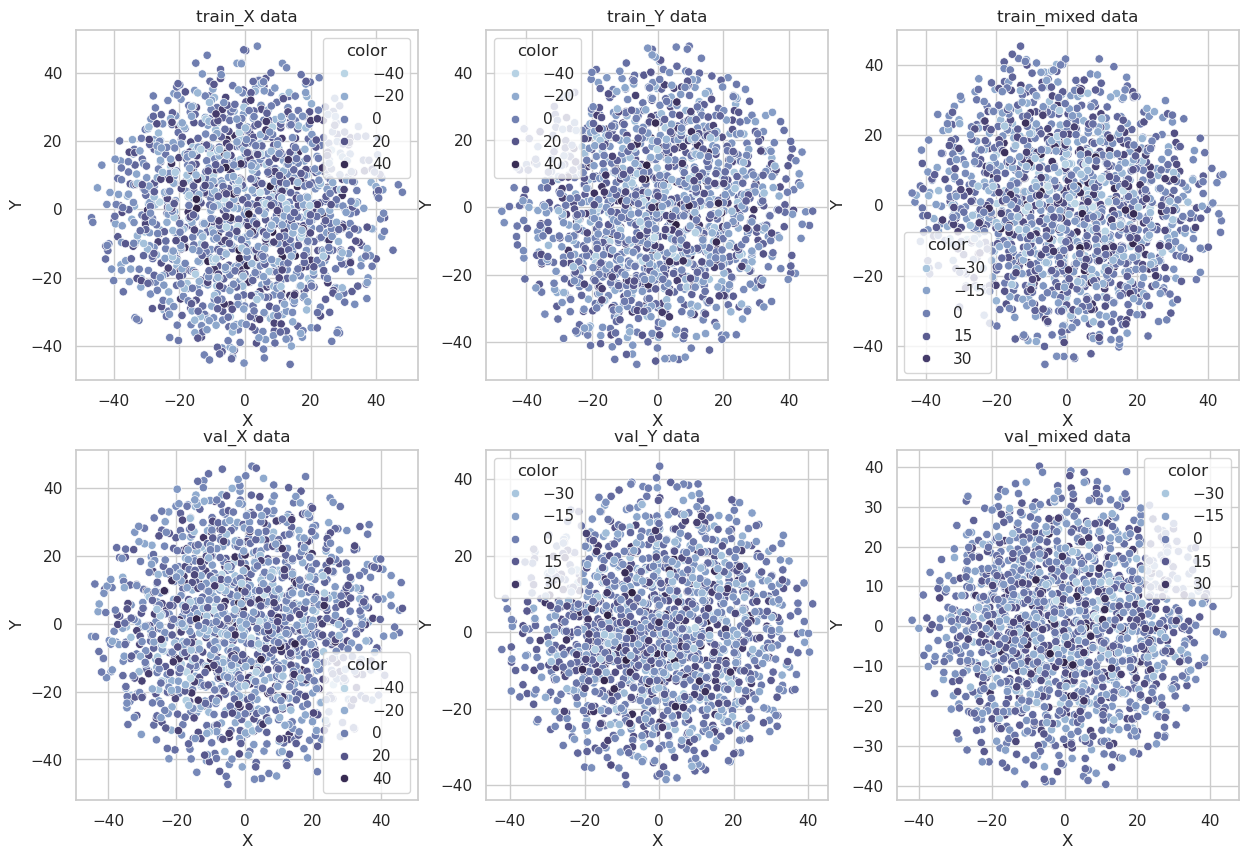

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:99.76435852050781, unif:-11.629359245300293
real graph loaded!
Y domain train - align:88.33942413330078, unif:-11.318904876708984
real graph loaded!
mixed domain train - align:4.492570400238037, unif:-9.879883766174316
real graph loaded!
X domain val - align:130.24591064453125, unif:-13.933127403259277
real graph loaded!
Y domain val - align:97.87648010253906, unif:-13.57909870147705
real graph loaded!
mixed domain val - align:5.53752326965332, unif:-12.016545295715332


In [29]:
path = "./pretrain_models/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_100_300/10/pretrain_model.pt"
size = 2000
n_components = 3    
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path = "./pretrain_models/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_100_300/40/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path = "./pretrain_models/Movie-Book/pretrain_proto_CL_dropout_joint_cluster_100_300/70/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = n_components)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")

real graph loaded!


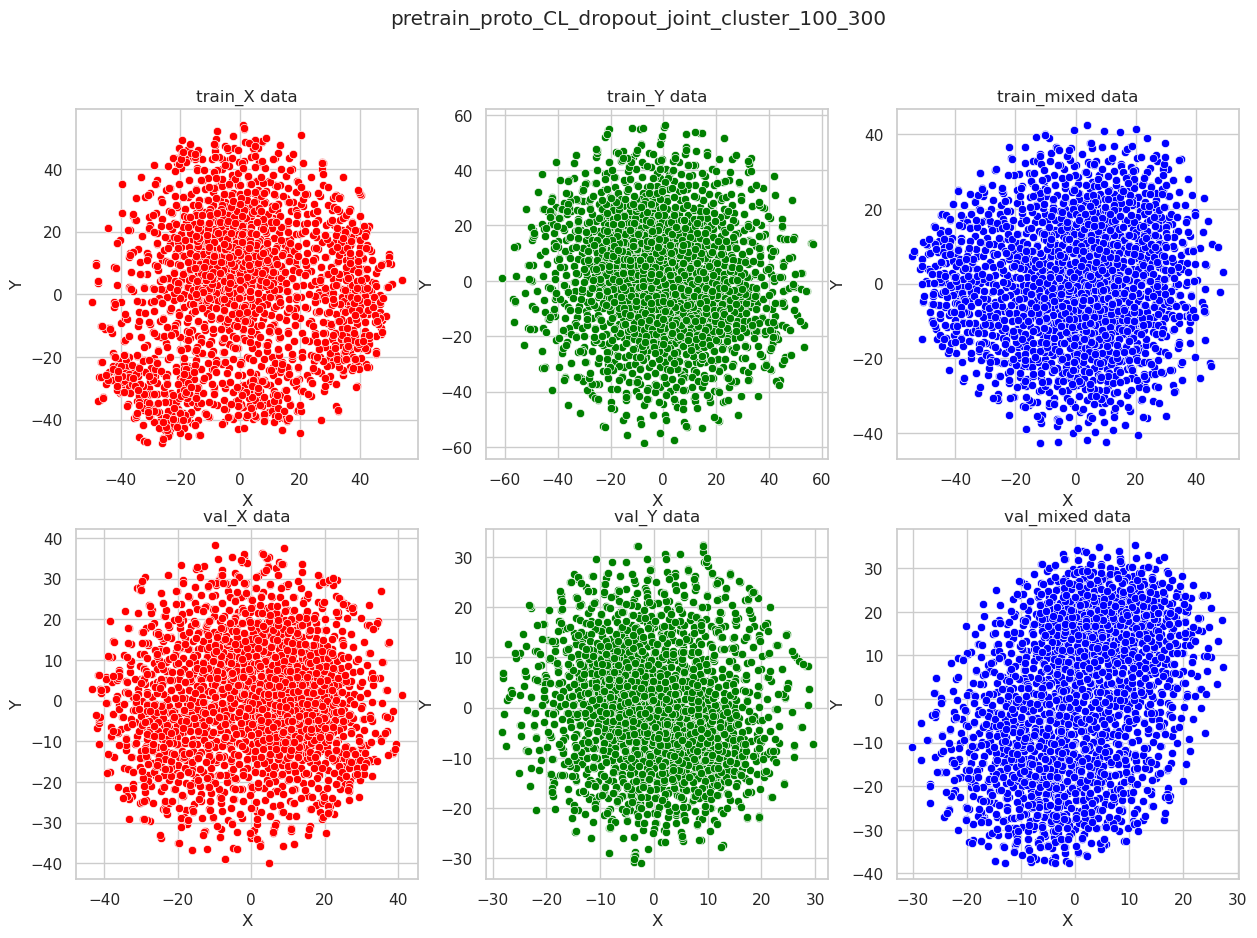

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:15.895565032958984, unif:-10.61725902557373
real graph loaded!
Y domain train - align:16.790512084960938, unif:-10.352450370788574
real graph loaded!
mixed domain train - align:4.460663318634033, unif:-9.823671340942383
real graph loaded!
X domain val - align:19.531850814819336, unif:-14.522848129272461
real graph loaded!
Y domain val - align:17.652467727661133, unif:-16.68313980102539
real graph loaded!
mixed domain val - align:5.51384162902832, unif:-12.2294921875
real graph loaded!


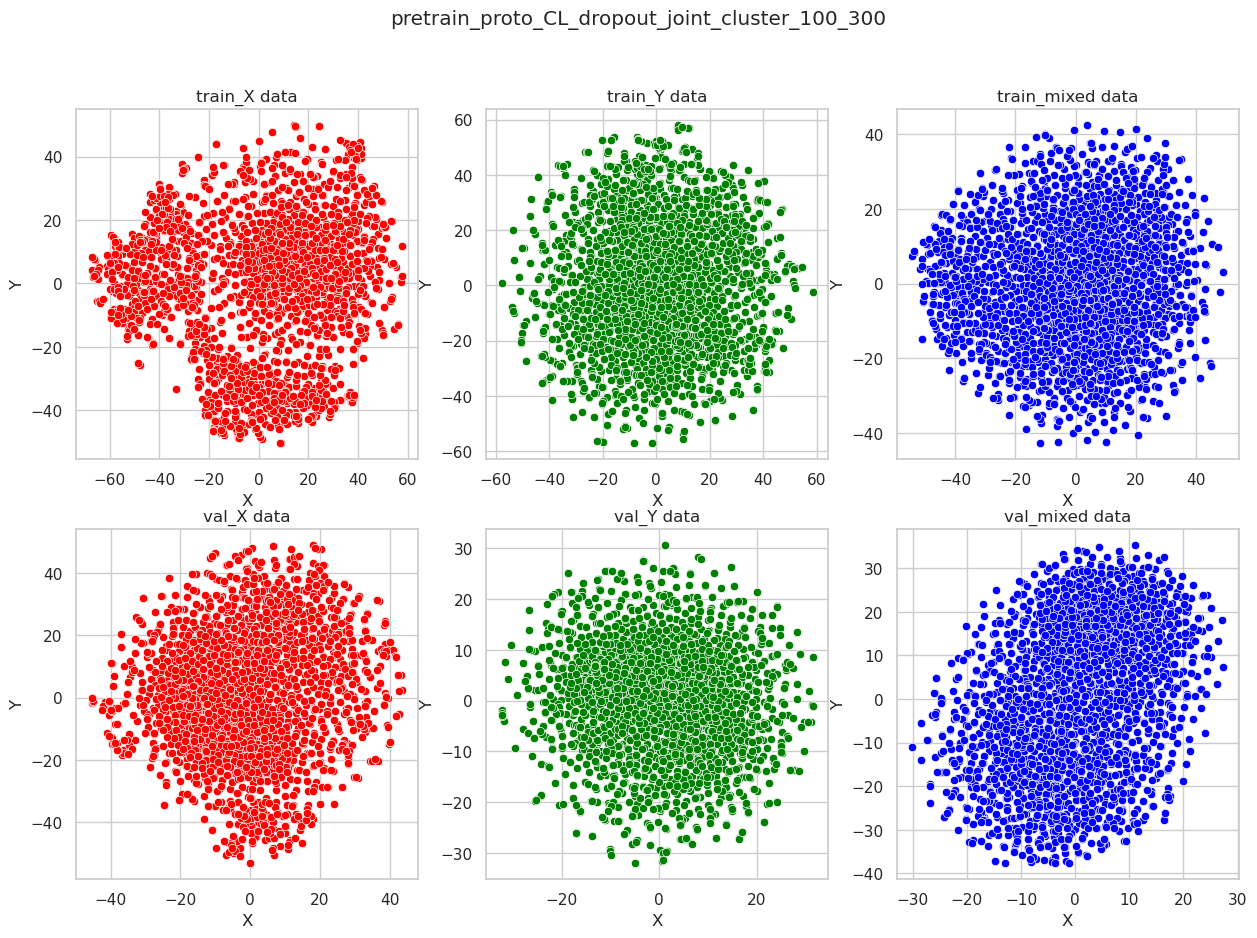

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:36.983211517333984, unif:-10.621794700622559
real graph loaded!
Y domain train - align:39.29716873168945, unif:-10.352557182312012
real graph loaded!
mixed domain train - align:4.460663318634033, unif:-9.823671340942383
real graph loaded!
X domain val - align:46.88032913208008, unif:-14.575398445129395
real graph loaded!
Y domain val - align:42.75218963623047, unif:-16.705692291259766
real graph loaded!
mixed domain val - align:5.51384162902832, unif:-12.2294921875
real graph loaded!


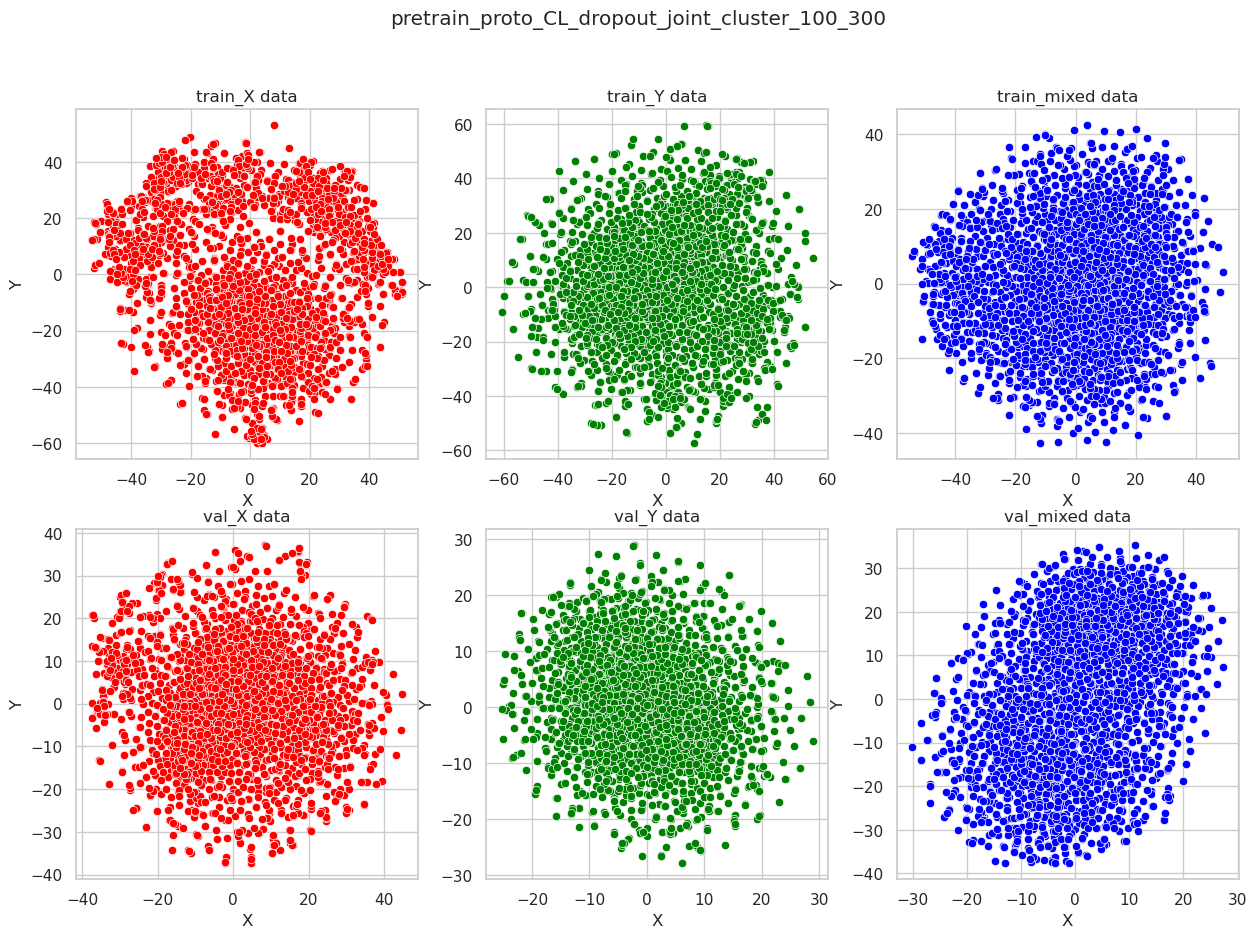

/mnt/samuel/C2DSR/C2DSR_src/utils/GraphMaker.py:12: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


real graph loaded!
X domain train - align:45.181541442871094, unif:-10.62358283996582
real graph loaded!
Y domain train - align:45.341285705566406, unif:-10.352745056152344
real graph loaded!
mixed domain train - align:4.460663318634033, unif:-9.823671340942383
real graph loaded!
X domain val - align:56.664676666259766, unif:-14.59197998046875
real graph loaded!
Y domain val - align:49.56351089477539, unif:-16.70571517944336
real graph loaded!
mixed domain val - align:5.51384162902832, unif:-12.2294921875


In [32]:
#還沒跑
path = "./pretrain_models/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_100_300/10/pretrain_model.pt"
size = 2000
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size,n_components = 2)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path = "./pretrain_models/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_100_300/40/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")
path ="./pretrain_models/Food-Kitchen/pretrain_proto_CL_dropout_joint_cluster_100_300/70/pretrain_model.pt"
plot_embedding_for_all(path, seed=0, train_mode="pretrain", size = size)
cal_alignment_uniformity_all(path, seed=0, train_mode="pretrain")